In [300]:
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical
from keras import models, layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy

In [229]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [230]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [231]:
y_train = train['label']

In [232]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [233]:
x_train = train.drop(labels=['label'], axis = 1)

In [234]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
# y_train = y_train.values.reshape(-1,1)

In [236]:
x_train.shape, y_train.shape

((42000, 784), (42000,))

In [237]:
test.shape

(28000, 784)

In [238]:
x_train = x_train/255.0
x_train = x_train.values.reshape(-1, 28, 28, 1)

In [239]:
x_train.shape

(42000, 28, 28, 1)

In [240]:
test = test/255.0
test = test.values.reshape(-1, 28, 28, 1)

In [241]:
test.shape

(28000, 28, 28, 1)

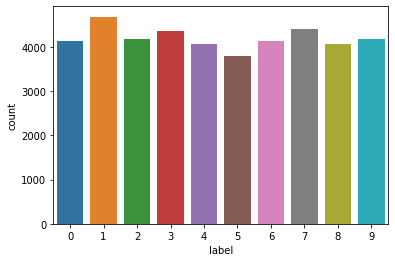

In [242]:
g = sns.countplot(y_train)

In [243]:
y_train = to_categorical(y_train, num_classes=10)

In [244]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [245]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2)

In [254]:
x_train.shape, x_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1))

In [247]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [248]:
model.summary()

Model: &quot;sequential_2&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64

In [250]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

In [253]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/20
296/296 [==============================] - 10s 35ms/step - loss: 0.1414 - acc: 0.9574 - val_loss: 0.0640 - val_acc: 0.9800
Epoch 2/20
296/296 [==============================] - 10s 35ms/step - loss: 0.1098 - acc: 0.9680 - val_loss: 0.0776 - val_acc: 0.9748
Epoch 3/20
296/296 [==============================] - 10s 34ms/step - loss: 0.0945 - acc: 0.9707 - val_loss: 0.0472 - val_acc: 0.9857
Epoch 4/20
296/296 [==============================] - 10s 33ms/step - loss: 0.0831 - acc: 0.9765 - val_loss: 0.0455 - val_acc: 0.9879
Epoch 5/20
296/296 [==============================] - 10s 35ms/step - loss: 0.0729 - acc: 0.9779 - val_loss: 0.0424 - val_acc: 0.9860
Epoch 6/20
296/296 [==============================] - 10s 35ms/step - loss: 0.0710 - acc: 0.9789 - val_loss: 0.0394 - val_acc: 0.9881
Epoch 7/20
296/296 [==============================] - 10s 35ms/step - loss: 0.0662 - acc: 0.9804 - val_loss: 0.0372 - val_acc: 0.9900
Epoch 8/20
296/296 [==============================] - 10s 34ms

In [260]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

&lt;matplotlib.legend.Legend at 0x7f2e40af15b0&gt;

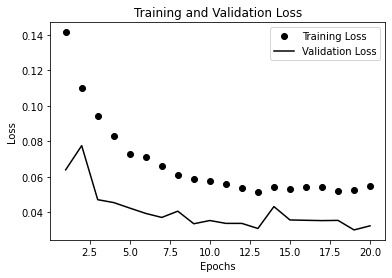

In [265]:
epochs = range(1, 21)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

&lt;matplotlib.legend.Legend at 0x7f2dacf429d0&gt;

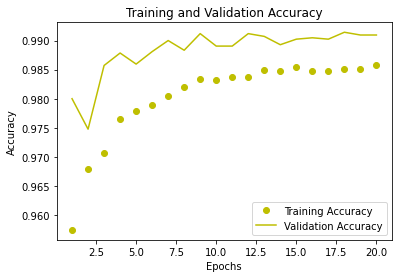

In [266]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [270]:
results = model.predict(test)

In [320]:
image = 14000

In [321]:
results[image]

array([4.2237036e-10, 8.7839602e-08, 4.0389421e-07, 9.9996734e-01,
       1.7429933e-09, 2.9492379e-05, 1.4946051e-09, 5.7214413e-07,
       1.5563708e-06, 6.3697769e-07], dtype=float32)

In [322]:
numpy.where(results[image] == results[image].max())

(array([3]),)

&lt;matplotlib.image.AxesImage at 0x7f2e2d0fc5b0&gt;

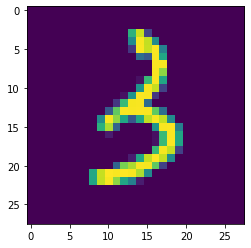

In [323]:
plt.imshow(test[image])